# Chapter 4 Lab: LDA QDA and KNN

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


[1] 1250    9

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


[1] 252   9

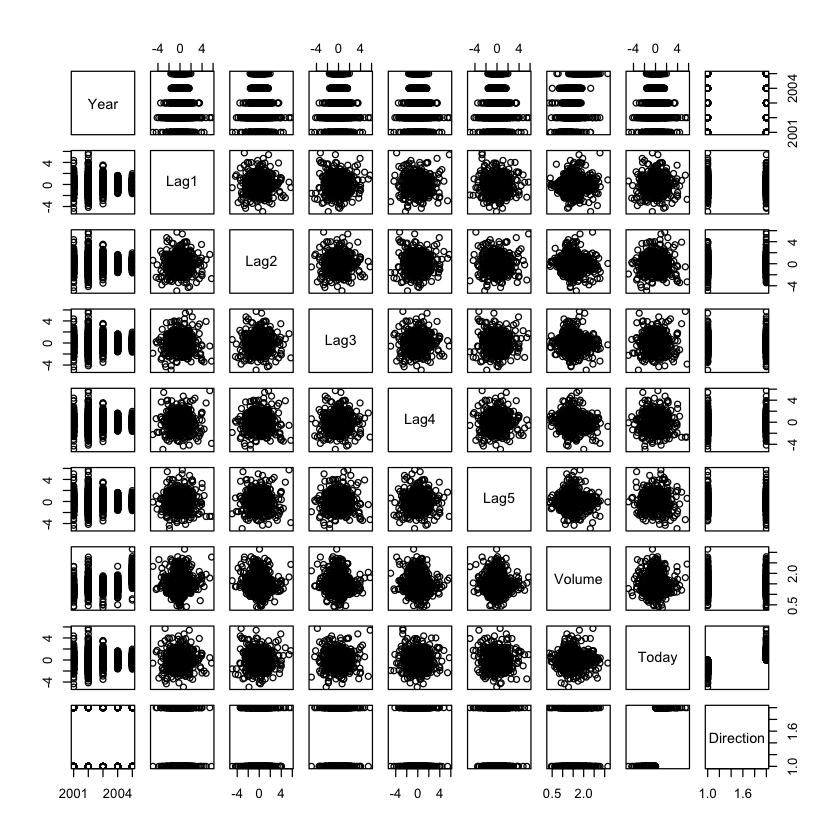

In [4]:
library(ISLR)
attach(Smarket)
head(Smarket)
dim(Smarket)
summary(Smarket)
pairs(Smarket)
cor(Smarket[,-9])
train=(Year<2005)
Smarket.2005=Smarket[!train,]
dim(Smarket.2005)
Direction.2005=Direction[!train]

## LDA
In R, we fit an LDA modelusing the `lda()` function, which is part of the `MASS` library. 
- Notice that the  syntax for the `lda()` function is identical to that of `lm()`, and to that of `glm()` except for the absence of the `family` option.

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

,LD1
Lag1,-0.6420190
Lag2,-0.5135293


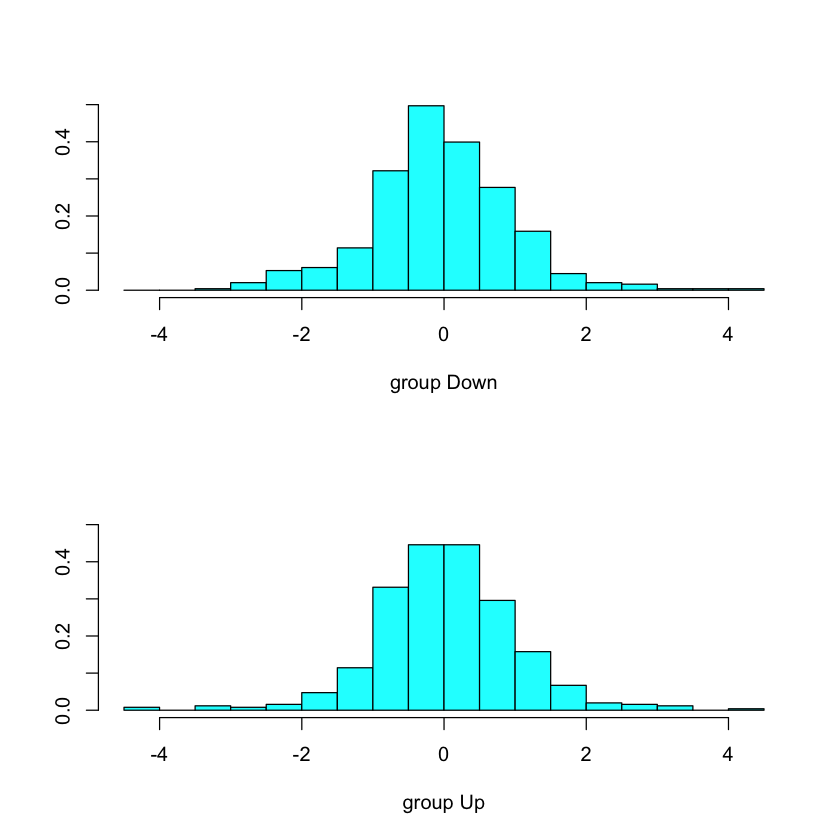

In [18]:
# Linear Discriminant Analysis

library(MASS)
lda.fit=lda(Direction~Lag1+Lag2,data=Smarket,subset=train)
lda.fit
plot(lda.fit)
lda.fit$

- The LDA output indicates that $\pi_1 = 0.492$ and $\pi_2 = 0.508$; in other words, 49.2% of the training observations correspond to days during which the market went down. 
- It also provides the group means; these are the average of each predictor within each class, and are used by LDA as estimate of $\mu_k$. 
- These suggest that there is a tendency for the previous 2 days returns to be negative on days when the market increases, and a tendency for the previous days’ returns to be positive on days when the market declines.

In [7]:
lda.pred=predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

- The `predict()` function returns a list with three elements. We focus on the first two
- The first element, `class`, contains LDA’s predictions about the movement of the market.
- The second element, `posterior`, is a matrix whose kth column contains theposterior probability that the corresponding observation belongs to the kthclass. 

In [8]:
head(lda.pred$posterior)
head(lda.pred$class) # this prediction uses 0.5 as the posterior threshold

,Down,Up
999,0.4901792,0.5098208
1000,0.4792185,0.5207815
1001,0.4668185,0.5331815
1002,0.4740011,0.5259989
1003,0.4927877,0.5072123
1004,0.4938562,0.5061438


[1] Up Up Up Up Up Up
Levels: Down Up

In [9]:
lda.class=lda.pred$class
table(lda.class,Direction.2005)
cat("The prediction accuracy is",mean(lda.class==Direction.2005),"\n")

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

The prediction accuracy is 0.5595238 


- The prediction performance is the same as logistic regression.

## QDA
We will now fit a QDA model to the Smarket data. QDA is implemented in R using the `qda()` function, which is also part of the `MASS` library. The syntax is identical to that of `lda()`.

In [11]:
# Quadratic Discriminant Analysis

qda.fit=qda(Direction~Lag1+Lag2,data=Smarket,subset=train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [12]:
qda.class=predict(qda.fit,Smarket.2005)$class
table(qda.class,Direction.2005)
cat("The prediction accuracy is now ",mean(qda.class==Direction.2005),"!\n",sep="")

         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

The prediction accuracy is now 0.5992063!


Interestingly, the QDA predictions are accurate almost 60% of the time, even though the 2005 data was not used to fit the model. This level of accuracy is quite impressive for stock market data, which is known to be quite
hard to model accurately.
- This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linearforms assumed by LDA and logistic regression. 
- However, it would be better to evaluate this method’s performance on a larger test set before betting that this approach will consistently beat the market!

## KNN

In [16]:
# K-Nearest Neighbors
library(class)

train.X=cbind(Lag1,Lag2)[train,]
test.X=cbind(Lag1,Lag2)[!train,]
train.Direction=Direction[train]
set.seed(1) # set seed for tied values
knn.pred=knn(train.X,test.X,train.Direction,k=1)
table(knn.pred,Direction.2005)
cat("The prediction accuracy is",mean(knn.pred==Direction.2005),"\n")

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

The prediction accuracy is 0.5 


In [17]:
# Increase k to 3
knn.pred=knn(train.X,test.X,train.Direction,k=3)
table(knn.pred,Direction.2005)
cat("The prediction accuracy is",mean(knn.pred==Direction.2005),"\n")

        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87

The prediction accuracy is 0.5357143 
